In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
%matplotlib inline


In [2]:
my_data_dir = 'C:\\Users\\Marcin\\Desktop\\Python\\Studia\\RoadClassification\\baza'

In [3]:
os.listdir(my_data_dir)

['train', 'val']

In [4]:
val_path = my_data_dir+'\\val\\'
train_path = my_data_dir+'\\train\\'

In [5]:
os.listdir(val_path)

['Asfalt', 'Kostka', 'Polna', 'Utwardzona']

In [6]:
os.listdir(train_path)

['Asfalt', 'Kostka', 'Polna', 'Utwardzona']

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_image_gen = ImageDataGenerator(rescale=1. /255,# Rescale the image by normalzing it
                                     horizontal_flip = True,
                                     vertical_flip= True,
                                     brightness_range=[0.2,1.0],
                                     featurewise_center=True,
                                     featurewise_std_normalization=True
                              )

In [9]:
val_image_gen = ImageDataGenerator(rescale=1. /255, # Rescale the image by normalzing it
                              )

In [10]:
image_shape = (220,220,3)
batch_size = 16

In [11]:
train_images = train_image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='categorical',
                                                  batch_size=batch_size)

Found 627 images belonging to 4 classes.


In [12]:
val_images = val_image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                             shuffle = False)

Found 210 images belonging to 4 classes.


In [13]:
x,y = train_images.next()

C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


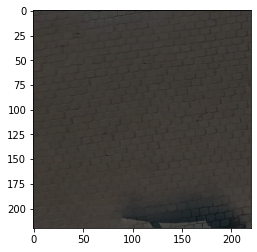

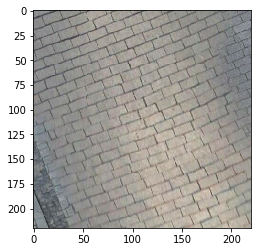

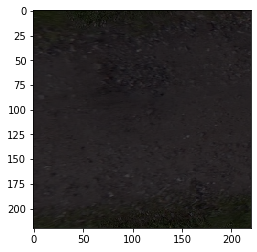

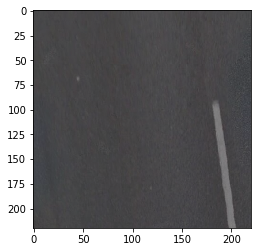

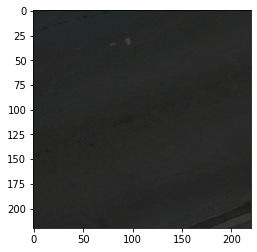

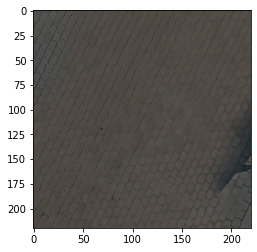

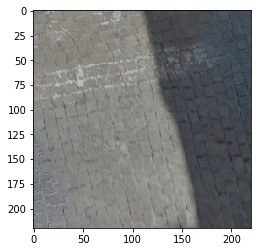

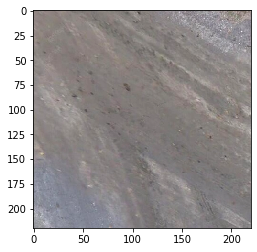

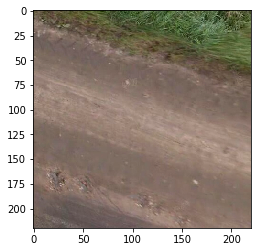

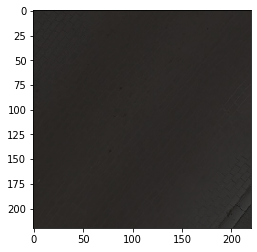

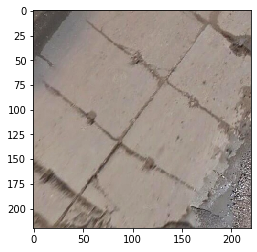

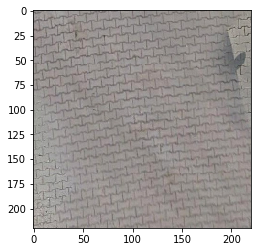

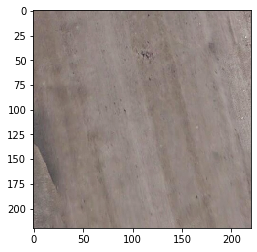

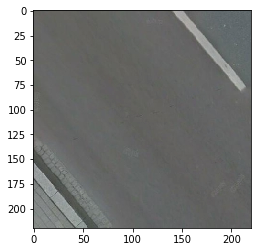

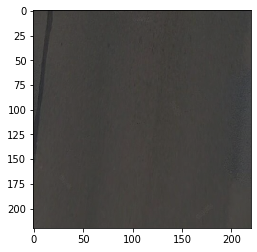

In [14]:
for i in range(0,15):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [20]:
#using initializations described in Kaiman paper should develop perfomance on conv lauers
conv_initializer = tf.keras.initializers.he_uniform(
    seed=None
)

In [23]:
#“ImageNet Classification with Deep Convolutional Neural Networks”
conv_reg_weight = 0.0005
dense_reg_weight = 0.001

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=image_shape, activation='relu', strides=(2,2), 
                 kernel_initializer=conv_initializer))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                 kernel_initializer=conv_initializer))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                 kernel_initializer=conv_initializer))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                 kernel_initializer=conv_initializer))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                 kernel_initializer=conv_initializer))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                 kernel_initializer=conv_initializer))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',
                 kernel_initializer=conv_initializer))
model.add(MaxPooling2D(pool_size=(3, 3)))
                       
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',
                kernel_initializer=conv_initializer))
          
model.add(Flatten())

model.add(Dense(384, activation='relu', kernel_regularizer=l2(dense_reg_weight)))
#Final layer
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 108, 108, 32)      2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 104, 104, 32)      9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 102, 102, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 30, 30, 64)       

In [20]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#with tf.device('/GPU:0'):

Num GPUs Available:  1


In [21]:
from tensorflow.keras.callbacks import EarlyStopping    

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2, restore_best_weights=True)

In [23]:
#https://stackoverflow.com/questions/48225729/importerrorcould-not-import-pil-image-working-with-keras-ternsorflow/50775336
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [24]:
from PIL import Image
print(Image.__file__)
import Image
print(Image.__file__)

C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\PIL\Image.py
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\PIL\Image.py


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
with tf.device('/GPU:0'):
    results = model.fit_generator(train_images,epochs=50,
                                  validation_data=val_images,
                                 callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 40 steps, validate for 14 steps
Epoch 1/50
40/40 [==============================] - 4s 92ms/step - loss: 0.2895 - accuracy: 0.9234 - val_loss: 0.7255 - val_accuracy: 0.7667
Epoch 2/50
40/40 [==============================] - 4s 97ms/step - loss: 0.5836 - accuracy: 0.8038 - val_loss: 0.6007 - val_accuracy: 0.8000
Epoch 3/50
40/40 [==============================] - 4s 90ms/step - loss: 0.3932 - accuracy: 0.8772 - val_loss: 0.5312 - val_accuracy: 0.8619
Epoch 4/50
40/40 [==============================] - 3s 85ms/step - loss: 0.4021 - accuracy: 0.8900 - val_loss: 0.4738 - val_accuracy: 0.8190
Epoch 5/50
40/40 [==============================] - 3s 84ms/step - loss: 0.2647 - accuracy: 0.9346 - val_loss: 0.4865 - val_accuracy: 0.8381
Epoch 6/50
40/40 [==============================] - 3s 84ms/step - loss: 0.2885 - accuracy: 0.9203 - val_loss: 0.4700 - val_accuracy: 0.8619
Epoch 7/50
40/40 [==============================] - 3s 85ms/st

In [18]:
from tensorflow.keras.models import load_model

In [19]:
model = load_model("./modele/Model2_4cat_aug_init_densReg.h5")

In [42]:
losses = pd.DataFrame(model.history.history)

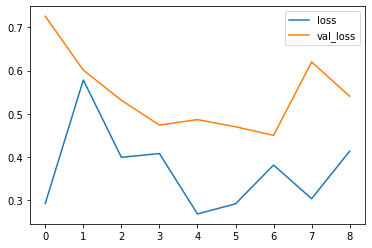

In [43]:
losses[['loss','val_loss']].plot()

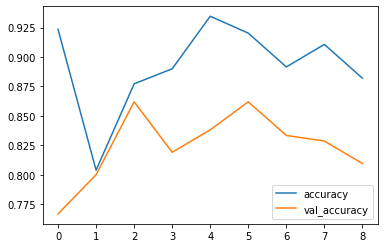

In [44]:
losses[['accuracy','val_accuracy']].plot()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
model.evaluate_generator(val_images)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.4935205632022449, 0.84761906]

In [22]:
def getPredictionsIndices(val_images):
    pred= model.predict_generator(val_images)
    predicted_class_indices=np.argmax(pred,axis=1)
    return predicted_class_indices

In [23]:
def getLabelsIndicesDicts(val_images):
    labelsToIndices = (val_images.class_indices)
    IndicesToLabels = dict((v,k) for k,v in labels.items())
    return labelsToIndices, IndicesToLabels

In [24]:
def getPredictionsLabels(val_images):
    predictions = [IndicesToLabels[k] for k in predicted_class_indices]
    return predictions

In [25]:
labels2

NameError: name 'labels2' is not defined

In [26]:
predicted_class_indices = getPredictionsIndices(val_images)

Instructions for updating:
Please use Model.predict, which supports generators.


In [27]:
print(classification_report(val_images.classes,predicted_class_indices))

              precision    recall  f1-score   support

           0       0.97      0.58      0.73        53
           1       0.81      0.98      0.88        51
           2       0.79      0.92      0.85        50
           3       0.88      0.91      0.89        56

    accuracy                           0.85       210
   macro avg       0.86      0.85      0.84       210
weighted avg       0.86      0.85      0.84       210



In [49]:
confusion_matrix(val_images.classes, predicted_class_indices)

array([[28,  7, 14,  4],
       [ 1, 48,  2,  0],
       [ 0,  0, 45,  5],
       [ 1,  0,  1, 54]], dtype=int64)

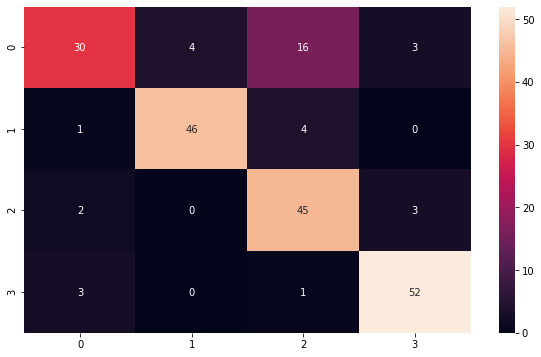

In [37]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(val_images.classes,predicted_class_indices),annot=True)
#y - true 
#x - predicted

In [50]:
model.save("Model2_4cat_aug_init_densRegv2.h5")